# Corss Check Compton between Simulation and Script

__Author: Antonio Gómez Carrera__

In [1]:
import ROOT

Welcome to JupyROOT 6.30/02


In [2]:
name = 'output0-0_t0.root'
file = ROOT.TFile(name)

Parameters used:

```
    _world_width = 682*mm;
    _world_height = 562*mm;
    _world_depth = 354*mm;

    _detector_size = 300*mm;
    _detector_thickness = 150*um;
    _detector_number = 2;
    
    _detector_distance[1] = 100*mm;
    _detector_distance[2] = 200*mm;
    
    Particle_Energy = 70keV

```

Beam of 500 000 000 particles

Physic lists:
* EmStandarPhysics_option4
* DecayPhysics


### Do a loop to check the flight of time of each particle
Select interesting events

In [3]:
print_bool = False
# Create a new TFile for storing Compton events
compton_events = ROOT.TFile(f"compton_events_{name}", "RECREATE")

pre_event = -1
pre_detector = -1
pre_particle = -1
pre_time = -1

# Create a new TTree for storing Compton events
compton_tree = ROOT.TTree("Hits", "Hits")
event = ROOT.vector('int')()
Detector1Time = ROOT.vector('double')()
Detector2Time = ROOT.vector('double')()

# Define branches in the new TTree
compton_tree.Branch("Event", event)
compton_tree.Branch("Detector1Time", Detector1Time)
compton_tree.Branch("Detector2Time", Detector2Time)


for line in file.Hits:
    if line.ParticleID == 22:    
        if line.Event == pre_event:
            # Time selection to avoid hits in detector2 first
            if line.DetectorID != pre_detector and pre_time <= 600:
                if print_bool:
                    print("Photon detected in both detectors")
                    print("Event: ", line.Event)
                    print("Time in detector 1: ", pre_time)
                    print("Time in detector 2: ", line.Time)
                
                # Fill the Compton event information to the new TTree
                event.push_back(line.Event)
                Detector1Time.push_back(pre_time)
                Detector2Time.push_back(line.Time)
        
        pre_event = line.Event
        pre_detector = line.DetectorID
        pre_particle = line.ParticleID
        pre_time = line.Time

compton_tree.Fill()
compton_tree.Write()
compton_events.Write()
compton_events.Close()

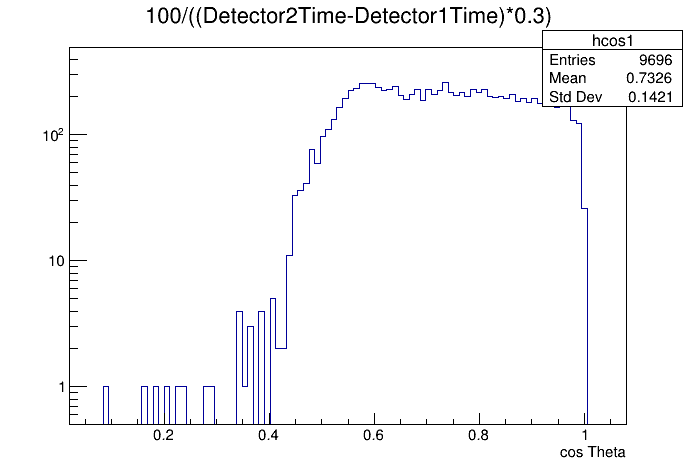

In [7]:
compton_events = ROOT.TFile(f"compton_events_{name}")
c11 = ROOT.TCanvas()
c11.SetLogy()
compton_events.Hits.Draw("100/((Detector2Time-Detector1Time)*0.3)>>hcos1","", "")
hcos1 = ROOT.gDirectory.Get("hcos1")
hcos1.GetXaxis().SetTitle('cos Theta')
c11.Draw()

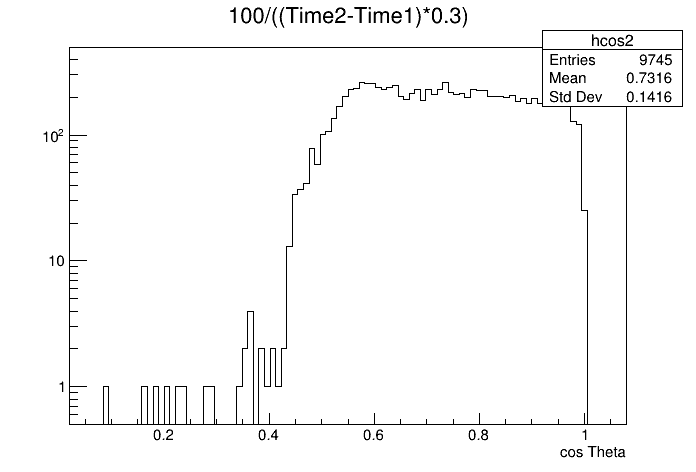

In [6]:
# Only for simulation with ComptonHits tree
c11a = ROOT.TCanvas()
c11a.SetLogy()
file.ComptonHits.Draw("100/((Time2-Time1)*0.3)>>hcos2","", "")
hcos2 = ROOT.gDirectory.Get("hcos2")
hcos2.GetXaxis().SetTitle('cos Theta')
c11a.Draw()


Compton efficienciy ($\epsilon$)

$$
\epsilon = \frac{\text{Compton events}}{\text{Total events}}= \frac{9805}{5e8}=1.961e-5

$$
